# Pig Contact Detection System Using Convolutional Neural Networks
**For Detection, it uses YOLOv5 with CSPDarknet as the backbone**<br>
**For Interaction, it compares between IoU and a calibrated interaction threshold**<br>

_Notebook by Joackin Santos_

**Main Notebook:**
https://colab.research.google.com/drive/1orWlSQr0xjVmVI-2SvIuBQiu3wvIgBS3?usp=sharing

This is the accompanying notebook for the Pig Contact Detection System. This notebook uses the weights (*.pt) from the trained models to output the coordinates of the bounding boxes from detect.py of YOLOv5. The output is used to get the IoU (Intersection over Union) of the heads and rears in an image. This will be used to compute for interaction, based on a calibrated IoU threshold.

This will use the AFBI and AUF datasets to get predictions and truth values (annotated) to evaluate the interaction method. 

Upon evaluation of the best threshold, the method will be extracted for single image use, to be integrated to the website application. 

## Setup

In [ ]:
# for folder deletions
import shutil
shutil.rmtree('/content/datasets')

**Cloning Repositories**

In [1]:
# clone repository containing yolov5 and datasets
# rename pig-datasets repo to datasets for yolov5
%cd /content
!git clone -b interaction-method https://github.com/joackinsantos/YOLOv5-Modification
!git clone https://github.com/joackinsantos/pig-datasets datasets

/content
Cloning into 'YOLOv5-Modification'...
remote: Enumerating objects: 9872, done.
remote: Counting objects: 100% (64/64), done.
remote: Compressing objects: 100% (43/43), done.
remote: Total 9872 (delta 33), reused 46 (delta 19), pack-reused 9808
Receiving objects: 100% (9872/9872), 41.00 MiB | 30.74 MiB/s, done.
Resolving deltas: 100% (117/117), done.
Cloning into 'datasets'...
remote: Enumerating objects: 27727, done.
remote: Counting objects: 100% (767/767), done.
remote: Compressing objects: 100% (752/752), done.
remote: Total 27727 (delta 15), reused 767 (delta 15), pack-reused 26960
Receiving objects: 100% (27727/27727), 884.93 MiB | 36.04 MiB/s, done.
Resolving deltas: 100% (32/32), done.
Updating files: 100% (29633/29633), done.


**Data Paths**

In [8]:
# resource paths
AFBI_path = '/content/datasets/interaction-set/AFBI'
AUF_path = '/content/datasets/interaction-set/AUF'
Combined_path = '/content/datasets/interaction-set/Combined'
Combined_csv_path = '/content/datasets/interaction-set/Combined.csv'
img_AFBI_path = '/content/datasets/interaction-set/AFBI/AFBI001.jpg'
img_AUF_path = '/content/datasets/interaction-set/AUF/AUPF190.jpg'
weight_path = '/content/YOLOv5-Modification/test-weights/'

In [ ]:
%ls

benchmarks.py    detect.py   __pycache__/      segment/        utils/
CITATION.cff     export.py   README.md         setup.cfg       val.py
classify/        hubconf.py  README.zh-CN.md   test-weights/
CONTRIBUTING.md  LICENSE     requirements.txt  train.py
data/            models/     runs/             tutorial.ipynb


**Detection**
*detect.py was modified to extract bounding box properties such as:*
- image names
- confidence scores
- classfication and class index
- minX, minY, maxX, maxY <br>

This is exported as the "bounding-boxes.csv" file

**This uses the detect.py from YOLOv5 ultralytics repository**

In [ ]:
%cd /content/YOLOv5-Modification
!python detect.py --img 600 --weights {weight_path}/test.pt --source {Combined_path}

**This is the detect implementation in the website (img size can be adjusted)**

In [9]:
path_hubconfig = '/content/YOLOv5-Modification'
path_weightfile = '/content/YOLOv5-Modification/best-weights/test.pt'

In [15]:
import torch
import os

img_AFBI_path = '/content/datasets/interaction-set/AFBI/AFBI001.jpg'
img_AUF_path = '/content/datasets/interaction-set/AUF/AUPF190.jpg'

model = torch.hub.load(path_hubconfig, 'custom',
                     path=path_weightfile, source='local',)

jpg_files = []

for filename in os.listdir(Combined_path):
    if filename.endswith(".jpg"):
        file_path = os.path.join(Combined_path, filename)
        jpg_files.append(file_path)
# print(jpg_files)
# print(len(jpg_files))

results_torch = model(img_AUF_path, size=600)
results_torch.print()

YOLOv5 🚀 539e7e9 Python-3.10.11 torch-2.0.0+cu118 CPU



requirements: /content/requirements.txt not found, check failed.


Fusing layers... 
custom_YOLOv5m summary: 212 layers, 20856975 parameters, 0 gradients
Adding AutoShape... 
image 1/1: 447x709 12 Heads, 16 Rears
Speed: 9.2ms pre-process, 307.5ms inference, 1.4ms NMS per image at shape (1, 3, 384, 608)


In [ ]:
# sample df of bounding-box csv
%cd /content/YOLOv5-Modification
import pandas as pd

df = pd.read_csv('test.csv')
df

/content/YOLOv5-Modification


,Image_Name,Confidence Score,Object_Name,Class_Index,minX,maxX,minY,maxY
0,AFBI001.jpg,0.315416,Head,0,252,296,350,408
1,AFBI001.jpg,0.508910,Head,0,248,297,343,380
2,AFBI001.jpg,0.527385,Rear,1,286,330,349,387
3,AFBI001.jpg,0.529184,Head,0,309,351,217,266
4,AFBI001.jpg,0.633693,Rear,1,281,328,319,349
5,AFBI001.jpg,0.665945,Head,0,245,292,378,408
6,AFBI001.jpg,0.675250,Head,0,530,572,308,349
7,AFBI002.jpg,0.679245,Rear,1,91,136,305,333
8,AFBI002.jpg,0.692774,Rear,1,120,157,335,370
9,AFBI002.jpg,0.733357,Rear,1,650,696,282,324


**This is the Interaction Method (detect.py)**

In [ ]:
%cd /content/YOLOv5-Modification
import pandas as pd
import os

df = pd.read_csv('bounding-boxes.csv')

# variables
iou_threshold = 0.05

# df results
results_df = pd.DataFrame(columns=['Image_Name', 'Classification', 'Interaction_Count'])

def compute_interactions(data, threshold, results):
    # unique image names
    image_names = data['Image_Name'].unique()

    # loop for each unique name
    for name in image_names:
      # interaction variables
      interaction_flag = False
      interaction_count = 0

      # subset dataframe with this image name
      name_df = data[data['Image_Name'] == name]

      # subset dataframes of heads and rears
      head_df = name_df[name_df['Object_Name'] == 'Head'].reset_index(drop=True)
      rear_df = name_df[name_df['Object_Name'] == 'Rear'].reset_index(drop=True)

      # loop over heads and rears in the image
      for i, head_row in head_df.iterrows():
        for j, rear_row in rear_df.iterrows():
            # bounding box indexing
            # df[4] = minX, df[5] = maxX, df[6] = minY, df[7] = maxY

            head_minX = head_df.iloc[i, 4]
            head_maxX = head_df.iloc[i, 5]
            head_minY = head_df.iloc[i, 6]
            head_maxY = head_df.iloc[i, 7]

            rear_minX = rear_df.iloc[j, 4]
            rear_maxX = rear_df.iloc[j, 5]
            rear_minY = rear_df.iloc[j, 6]
            rear_maxY = rear_df.iloc[j, 7]

            # this is for the headBox and rearBox
            curr_iou = compute_iou(head_minX, head_maxX, head_minY, head_maxY,
                        rear_minX, rear_maxX, rear_minY, rear_maxY)
            
            # print("computed the IoU:", curr_iou)

            if (curr_iou >= threshold):
              interaction_flag = True
              interaction_count += 1

            # # tester
            # print(i, j)
            # print(head_minX, head_minY, head_maxX, head_maxY)
            # print(rear_minX, rear_minY, rear_maxX, rear_maxY)

      temp_list = [name, 
                   1 if interaction_flag else 0, 
                   interaction_count]
      results.loc[len(results)] = temp_list
    return results

def compute_iou(head_minX, head_maxX, head_minY, head_maxY, rear_minX, rear_maxX, rear_minY, rear_maxY):
    # determine (x,y) coordinates of the intersection rectangle
    x_left = max(head_minX, rear_minX)
    y_top = max(head_minY, rear_minY)
    x_right = min(head_maxX, rear_maxX)
    y_bottom = min(head_maxY, rear_maxY)

    # compute the area of intersection rectangle
    intersection_area = max(0, x_right - x_left + 1) * max(0, y_bottom - y_top + 1)

    # compute area of both prediction and ground-truth
    # rectangles
    headArea = (head_maxX - head_minX + 1) * (head_maxY - head_minY + 1)
    rearArea = (rear_maxX - rear_minX + 1) * (rear_maxY - rear_minY + 1)
    union_area = float(headArea + rearArea - intersection_area)

    # compute IoU
    iou = intersection_area / union_area
    return iou

res = compute_interactions(df, iou_threshold, results_df).copy()
if os.path.exists('results.csv'):
    os.remove('results.csv')
res.to_csv('results.csv', index=False)

# print(res)


/content/YOLOv5-Modification


**This is Interaction Method (PyTorch)**

In [16]:
%cd /content/YOLOv5-Modification
import pandas as pd
import os

# df format [xmin ymin xmax ymax confidence class name], xyxy index is the name
bb = results_torch.pandas().xyxy

# variables
iou_threshold = 0.05

# df results
results_df = pd.DataFrame(columns=['Classification', 'Interaction_Count'])

def compute_interactions(data, threshold, results):
    # loop for each unique name/ image
    for image in bb:
      # interaction variables
      interaction_flag = False
      interaction_count = 0

      # subset dataframe with this image name
      name_df = image

      # subset dataframes of heads and rears
      head_df = name_df[name_df['name'] == 'Head'].reset_index(drop=True)
      rear_df = name_df[name_df['name'] == 'Rear'].reset_index(drop=True)

      # loop over heads and rears in the image
      for i, head_row in head_df.iterrows():
        for j, rear_row in rear_df.iterrows():
            # bounding box indexing
            # df[0] = minX, df[1] = minY, df[2] = maxX, df[3] = maxY

            head_minX = head_df.iloc[i, 0]
            head_minY = head_df.iloc[i, 1]
            head_maxX = head_df.iloc[i, 2]
            head_maxY = head_df.iloc[i, 3]

            rear_minX = rear_df.iloc[j, 0]
            rear_minY = rear_df.iloc[j, 1]
            rear_maxX = rear_df.iloc[j, 2]
            rear_maxY = rear_df.iloc[j, 3]

            # this is for the headBox and rearBox
            curr_iou = compute_iou(head_minX, head_maxX, head_minY, head_maxY,
                        rear_minX, rear_maxX, rear_minY, rear_maxY)
            
            # print("computed the IoU:", curr_iou)

            if (curr_iou >= threshold):
              interaction_flag = True
              interaction_count += 1

            # # tester
            # print(i, j)
            # print(head_minX, head_minY, head_maxX, head_maxY)
            # print(rear_minX, rear_minY, rear_maxX, rear_maxY)

      temp_list = [1 if interaction_flag else 0, 
                   interaction_count]
      results.loc[len(results)] = temp_list
    return results

def compute_iou(head_minX, head_maxX, head_minY, head_maxY, rear_minX, rear_maxX, rear_minY, rear_maxY):
    # determine (x,y) coordinates of the intersection rectangle
    x_left = max(head_minX, rear_minX)
    y_top = max(head_minY, rear_minY)
    x_right = min(head_maxX, rear_maxX)
    y_bottom = min(head_maxY, rear_maxY)

    # compute the area of intersection rectangle
    intersection_area = max(0, x_right - x_left + 1) * max(0, y_bottom - y_top + 1)

    # compute area of both prediction and ground-truth
    # rectangles
    headArea = (head_maxX - head_minX + 1) * (head_maxY - head_minY + 1)
    rearArea = (rear_maxX - rear_minX + 1) * (rear_maxY - rear_minY + 1)
    union_area = float(headArea + rearArea - intersection_area)

    # compute IoU
    iou = intersection_area / union_area
    return iou

res = compute_interactions(bb, iou_threshold, results_df).copy()
if os.path.exists('results.csv'):
    os.remove('results.csv')
res.to_csv('results.csv', index=False)

print(res)

/content/YOLOv5-Modification
   Classification  Interaction_Count
0               1                  1


## Evaluations

**Getting and Processing Necessary Data**

In [ ]:
# if os.path.exists(Combined_csv_path):
#     os.remove(Combined_csv_path)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [ ]:
# True Values
truth_df = pd.read_csv(Combined_csv_path)
# Changing column names, removing extra \', binarizing the classification
binarize = lambda x: 0 if x == 0 else 1

truth_df['Image_Name'] = truth_df['Image_Name'].str.replace('\'', '')
truth_df['Classification'] = truth_df['Classification'].apply(binarize)

# truth_df

In [ ]:
# Getting truth_df counts
truth_df['is_AFBI'] = truth_df['Image_Name'].str.contains('AFBI').astype(int)
truth_df['is_AUF'] = truth_df['Image_Name'].str.contains('AUPF').astype(int)
AFBI_grouped = truth_df.groupby('is_AFBI')
# AUF_grouped = truth_df.groupby('is_AUF')

# This creates separated dfs for the two data sets
for name, group in AFBI_grouped:
    df_name = 'AFBI_group_df' if name else 'AUF_group_df'
    globals()[df_name] = group.copy()

truth = truth_df['Classification'].value_counts()
afbi = AFBI_group_df['Classification'].value_counts()
auf = AUF_group_df['Classification'].value_counts()
print("truth:\n", truth,'\n',"afbi:\n",afbi,'\n'," auf:\n",auf,'\n')

truth:
 0    456
1    282
Name: Classification, dtype: int64 
 afbi:
 0    322
1    111
Name: Classification, dtype: int64 
  auf:
 1    171
0    134
Name: Classification, dtype: int64 



In [ ]:
# Predicted Values
pred_df = pd.read_csv('results.csv')
# pred_df

In [ ]:
# Getting pred_df counts
pred_df['is_AFBI'] = pred_df['Image_Name'].str.contains('AFBI').astype(int)
pred_df['is_AUF'] = pred_df['Image_Name'].str.contains('AUPF').astype(int)
AFBI_grouped = pred_df.groupby('is_AFBI')

# AUF_grouped = truth_df.groupby('is_AUF')

# This creates separated dfs for the two data sets
for name, group in AFBI_grouped:
    df_name = 'AFBI_group_df' if name else 'AUF_group_df'
    globals()[df_name] = group.copy()

pred = pred_df['Classification'].value_counts()
afbi = AFBI_group_df['Classification'].value_counts()
auf = AUF_group_df['Classification'].value_counts()
print("pred:\n", pred,'\n',"afbi:\n",afbi,'\n'," auf:\n",auf,'\n')

pred:
 1    399
0    339
Name: Classification, dtype: int64 
 afbi:
 0    225
1    208
Name: Classification, dtype: int64 
  auf:
 1    191
0    114
Name: Classification, dtype: int64 



**Evalution Proper**

In [ ]:
print(truth_df.shape[0],
      pred_df.shape[0])

738 738


In [ ]:
y_true = truth_df["Classification"]
y_pred = pred_df["Classification"]

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)
confusion_matrix = confusion_matrix(y_true, y_pred)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:\n", confusion_matrix)

Accuracy: 0.7249322493224932
Precision: 0.5989974937343359
Recall: 0.8475177304964538
F1 Score: 0.7019089574155654
Confusion Matrix:
 [[296 160]
 [ 43 239]]


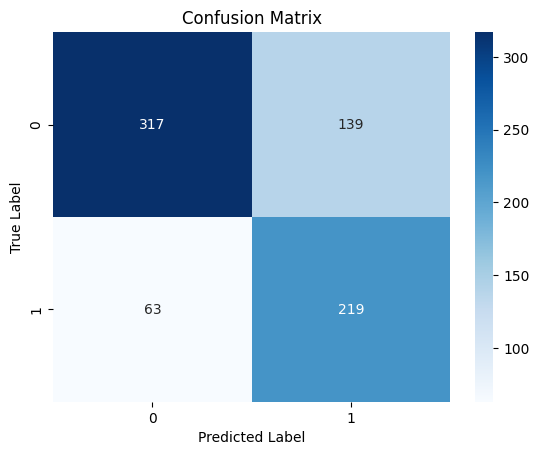

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# assume y_true and y_pred are the true and predicted labels
cm = confusion_matrix(y_true, y_pred)

# create a heatmap using seaborn
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")

# add axis labels and title
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")

# show the plot
plt.show()